### Upload and display the dataset

In [1]:
#Import pandas and load the olympics.csv.
#Show the first 5 rows. Here is the URL of data:
#https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv
#Create a new datafram for olympics

import pandas as pd
olympics = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv')
olympics.head(n=5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Display a specific column using bracket and dot notations

In [2]:
#Select only the NOC column using both the bracket and dot notations, show the top 5 rows.
#Use dot notation on the olympics dataframe to call the NOC column
#Use head to return the first 5 rows
olympics.NOC.head()

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [3]:
#Select only the NOC column using both the bracket and dot notations, show the top 5 rows.
#Use bracket notation on the olympics dataframe to call the NOC column
#Use head to return the first 5 rows
olympics['NOC'].head()

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

### Create a new dataframe for men's single badminton gold medal winners

In [4]:
#Select the rows of men's gold medals in singles badminton, and sort the results alphabetically by the player's names.
#Create a new mens single badminton dataframe
#Using loc and boolean function, return only the rows for men's single badminton gold medals
##Sport = Badminton
##Gender = Men
##Event = singles
##Medal = gold
#Using sort values, sort the athletes alphabetically
men_single_bad_df = olympics.loc[(olympics.Sport=='Badminton')&(olympics.Gender=='Men')&(olympics.Event=='singles')&(olympics.Medal=='Gold'),:]
men_single_bad_df = men_single_bad_df.sort_values('Athlete')
men_single_bad_df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
27741,Beijing,2008,Badminton,Badminton,"LIN, Dan",CHN,Men,singles,M,Gold


### List the top three countries that have won the most medals from 1984 to present

In [5]:
#List the top three countries (NOC column) that won the most medals from 1984 (inclusive) to present.
#Create a new top three dataframe
#Using loc return only the rows for 1984 olympics to present
#Using groupby, group the countries by medal count
#Using sort, sort the values from smallest to largest and return the top three using indexing
top_three = olympics.loc[(olympics.Edition>=1984), :]
top_three = olympics.groupby('NOC').Medal.count()
top_three = top_three.sort_values(ascending=False)[:3]
top_three

NOC
USA    4335
URS    2049
GBR    1594
Name: Medal, dtype: int64

### Plot the top three medal winners in 2008

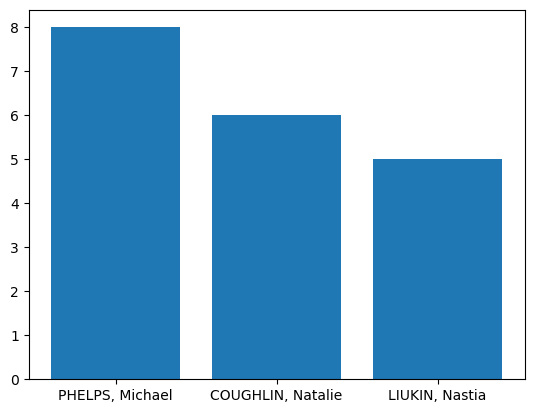

In [6]:
#Plot the number of medals of the top 3 athlete in 2008 using matplotlib.pyplot.
###use bar chart
###use value_counts(); note the returned results is a Series. So, the x axis is the index of Series.
#Import matplotlib
#Create a year dataframe
#Using loc, return only entries for 2008 olympics
#Create a top medal dataframe
#Using bracket notation and value counts to count the entries by athlete
#Using indexing return the top three athletes
#Using the bar plot function from matplotlib 
#Use the dataframe index function for the x axis and the dataframe values for the y axis

import matplotlib.pyplot as plt

year_df = olympics.loc[(olympics.Edition==2008), :]
top_medal_df = year_df['Athlete'].value_counts()[:3]

plt.bar(top_medal_df.index,top_medal_df.values)
plt.show()

### Use list comprehension to create a new column

In [7]:
#Use list comprehension to define a new column "is_US". 
#When the country is USA, the value of is_US is True, otherwise the value is False.
#In the olympics dataframe define a new column - 'is_US'
#Using list comprehension, iterate over every entry in the 'NOC' column
#Using boolean, if the entry is equal to USA return True, otherwise return False
#Use head to return the first 15 rows to confirm the list comprehension worked

olympics['is_US'] = [i=='USA' for i in olympics['NOC']]
olympics.head(15)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,is_US
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold,False
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver,False
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze,False
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold,False
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver,False
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze,False
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold,False
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver,False
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze,False
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold,False


### Use NumPy where function to replace values in a column

In [8]:
#Hide the medal information for 1988 olympics; i.e., when edition is 1988, change the Medal as "Unknown".
#Import NumPy
#For the Medal column in the olympics dataframe
#Call the NumPy where function
#Using a boolean function, if the entry in 'Edition' column is 1988
#Replace the existing value with 'Unkown', otherwise return the value of the 'Medal' column entry
#Using iloc, return rows with the 'Edition' column equal to 1988 to confirm the function worked

import numpy as np
     
olympics['Medal'] = np.where(olympics['Edition'] == 1988, 'Unknown', olympics['Medal'])
olympics.iloc[19000:19010,:]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,is_US
19000,Seoul,1988,Handball,Handball,"DIGRE, Berit",NOR,Women,handball,W,Unknown,False
19001,Seoul,1988,Handball,Handball,"ELIASSON, Marthe",NOR,Women,handball,W,Unknown,False
19002,Seoul,1988,Handball,Handball,"GOKSOR, Susann",NOR,Women,handball,W,Unknown,False
19003,Seoul,1988,Handball,Handball,"HALTVIK, Trine",NOR,Women,handball,W,Unknown,False
19004,Seoul,1988,Handball,Handball,"HEGH, Hanne",NOR,Women,handball,W,Unknown,False
19005,Seoul,1988,Handball,Handball,"HOGNESS, Hanne",NOR,Women,handball,W,Unknown,False
19006,Seoul,1988,Handball,Handball,"JOHNSEN, Vibeke",NOR,Women,handball,W,Unknown,False
19007,Seoul,1988,Handball,Handball,"MIDTHUN, Kristin",NOR,Women,handball,W,Unknown,False
19008,Seoul,1988,Handball,Handball,"PETTERSEN, Karin",NOR,Women,handball,W,Unknown,False
19009,Seoul,1988,Handball,Handball,"SINGSTAD, Karin",NOR,Women,handball,W,Unknown,False
